In [1]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# clf = SGDClassifier(loss='log', max_iter=1000,learning_rate='constant', eta0=0.01, random_state=0)
# clf.fit(X_train, y_train)
from sklearn.impute import KNNImputer
#
from fancyimpute import IterativeImputer,KNN
#
import scipy.stats as stats
#
from sklearn import metrics
#
from imblearn.over_sampling import SMOTE
#
from sklearn.metrics import classification_report , accuracy_score , recall_score
#
from pycaret.classification import *
#
import warnings
warnings.filterwarnings('ignore')

(CVXPY) Aug 27 06:07:09 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Aug 27 06:07:09 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Aug 27 06:07:09 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


# Read Train Data

In [2]:
train_data=pd.read_csv("train.csv",sep=",",encoding="utf-8")
train_data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11904,0x5bc2,CUS_0x7b2b,January,Soyoungc,38,337-58-4855,Architect,79631.28,6459.940000,6,...,Bad,2692.66,23.443857,15 Years and 2 Months,Yes,289.471213,167.42614205283854,High_spent_Medium_value_payments,439.0966449847151,Standard
48607,0x132cd,CUS_0x41eb,August,Lianaa,32,901-83-8493,Journalist,65498.88,5409.240000,9,...,_,3667.71,34.192265,13 Years and 0 Months,Yes,275.715941,122.28948788146776,High_spent_Medium_value_payments,392.9185708210297,Standard
44014,0x117e4,CUS_0x755e,July,Kirstino,28_,472-41-4865,Accountant,19127.84,1440.986667,7,...,Bad,2623.2,25.660484,NaN,Yes,63.970341,109.8720314555468,Low_spent_Large_value_payments,240.2562942547252,Good
80782,0x1ef54,CUS_0x4a9c,July,Sarah N.a,38,109-17-4044,Manager,33498.79,2995.565833,2,...,_,646.04,38.091566,31 Years and 4 Months,No,31473.000000,154.18590548904822,Low_spent_Small_value_payments,403.0696645338255,Standard
62200,0x18276,CUS_0xa22b,January,Egentere,22,207-76-1040,Journalist,88062.28,NaN,4,...,Good,404.44,27.650903,32 Years and 2 Months,No,0.000000,52.48971136350147,High_spent_Large_value_payments,928.662621969832,Standard
91194,0x22c58,CUS_0xb172,March,Christiaan Hetzners,20,432-52-4456,Mechanic,35093.6,2969.466667,4,...,Standard,916.22,34.579826,31 Years and 3 Months,Yes,0.000000,282.0299593994013,Low_spent_Medium_value_payments,294.91670726726534,Standard
92467,0x233cd,CUS_0xa15a,April,NaN,22,435-60-9418,Scientist,89870.98,7346.248333,1,...,Good,48.11,39.034051,26 Years and 5 Months,No,192.145744,585.1006067623545,Low_spent_Medium_value_payments,237.378482480309,Standard
16140,0x7492,CUS_0x91ee,May,Douglasy,31,475-37-1012,_______,59241.38,4818.781667,4,...,Good,690.12,36.932110,23 Years and 11 Months,No,128.929246,345.2936051718945,Low_spent_Medium_value_payments,287.65531576687147,Good
55946,0x15dd0,CUS_0xa4ee,March,Andrewz,18,595-44-8320,Journalist,7471.91_,597.659167,8,...,Standard,1814.13,29.905793,18 Years and 11 Months,Yes,18.694162,53.089257712639345,Low_spent_Small_value_payments,277.98249682562795,Poor
14127,0x68c5,CUS_0x6423,August,Nick Brownr,29,701-26-8627,Entrepreneur,68309.04,5422.231059,10,...,Bad,4249.96,36.316662,12 Years and 2 Months,Yes,782.099839,__10000__,High_spent_Medium_value_payments,334.98810019014235,Good


###### ID: Represents a unique identification of an entry
###### Customer_ID: Represents a unique identification of a person
###### Month: Represents the month of the year
###### Name: Represents the name of a person
###### Age: Represents the age of the person
###### SSN: Represents the social security number of a person
###### Occupation: Represents the occupation of the person
###### Annual_Income: Represents the annual income of the person 
###### Monthly_Inhand_Salary: Represents the monthly base salary of a person
###### Num_Bank_Accounts: Represents the number of bank accounts a person holds
###### Num_Credit_Card: Represents the number of other credit cards held by a person
###### Interest_Rate: Represents the interest rate on credit card
###### Num_of_Loan: Represents the number of loans taken from the bank
###### Type_of_Loan: Represents the types of loan taken by a person
###### Delay_from_due_date: Represents the average number of days delayed from the payment date
###### Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
###### Changed_Credit_Limit: Represents the percentage change in credit card limit
###### Num_Credit_Inquiries: Represents the number of credit card inquiries
###### Credit_Mix: Represents the classification of the mix of credits
###### Outstanding_Debt: Represents the remaining debt to be paid 
###### Credit_Utilization_Ratio: Represents the utilization ratio of credit card
###### Credit_History_Age: Represents the age of credit history of the person
###### Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
###### Total_EMI_per_month: Represents the monthly EMI payments  
###### Amount_invested_monthly: Represents the monthly amount invested by the customer 
###### Payment_Behaviour: Represents the payment behavior of the customer 
###### Monthly_Balance:Represents the monthly balance amount of the customer 
###### Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
train_data.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [5]:
train_data.duplicated().sum()

0

In [6]:
train_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
#Checking the values in the data whether they are valid or not
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train_data[i].unique())
        print()

ID: 
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

Customer_ID: 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month: 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Name: 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age: 
 ['23' '-500' '28_' ... '4808_' '2263' '1342']

SSN: 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

Occupation: 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income: 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

Num_of_Loan: 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '110

#### Some columns you may think that they are numerical but detected as object (categorical)


# Preprocessing and Handle invalid data
.we handle invalid data by replacing it with nan and removing in valid letters and symbols


In [8]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
train_data=train_data.drop(columns=["ID","Name","SSN"],axis=1)

In [10]:
train_data["Customer_ID"].duplicated().sum()

87500

## Credit_Mix

In [11]:
train_data["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [12]:
train_data['Credit_Mix']=train_data['Credit_Mix'].replace('_',np.nan)

## Changed_Credit_Limit

In [13]:
train_data["Changed_Credit_Limit"].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [14]:
train_data["Changed_Credit_Limit"].describe()

count     100000
unique      4384
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

In [15]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].replace('_',np.nan)

In [16]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].astype("float")

In [17]:
train_data["Changed_Credit_Limit"].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [18]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].fillna(train_data["Changed_Credit_Limit"].mean())

In [19]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].round(3)

## Monthly_Balance

In [20]:
train_data["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [21]:
train_data['Monthly_Balance']=train_data['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
train_data['Monthly_Balance']=train_data['Monthly_Balance'].astype("float")

In [22]:
train_data['Monthly_Balance']=train_data['Monthly_Balance'].fillna(train_data["Monthly_Balance"].mean())
train_data['Monthly_Balance']=train_data['Monthly_Balance'].round(3)

## Payment_Behaviour

In [23]:
train_data["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [24]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [25]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [26]:
train_data["Payment_Behaviour"].ffill(inplace=True)

In [27]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].astype("int64")

## Age

In [28]:
train_data["Age"].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [29]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [30]:
train_data["Age"] = train_data["Age"].apply(filter_col)
train_data["Age"] = train_data["Age"].astype(int)

In [31]:
for i in range(len(train_data["Age"])):
    if train_data["Age"][i] > 90 or train_data["Age"][i] < 10:
        train_data["Age"][i] = np.nan
    else:
        train_data["Age"][i] = train_data["Age"][i]

## Annual_Income

In [32]:
train_data["Annual_Income"] = train_data["Annual_Income"].apply(filter_col)
train_data["Annual_Income"] = train_data["Annual_Income"].astype(float)

## Num_of_Loan

In [33]:
train_data["Num_of_Loan"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: object

In [34]:
train_data["Num_of_Loan"] = train_data["Num_of_Loan"].apply(filter_col)

In [35]:
train_data["Num_of_Loan"]=train_data["Num_of_Loan"].astype(int)

In [36]:
train_data[train_data["Num_of_Loan"]>100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
21,CUS_0x2dbc,June,34.0,Engineer,143162.640,12187.220000,1,5,8,967,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,5,963.922,Good
810,CUS_0x6435,March,26.0,Writer,134321.440,11064.453333,3,5,12,1464,...,Standard,1428.68,34.223492,32 Years and 10 Months,Yes,253.688244,NaN,6,949.502,Standard
1390,CUS_0x64ce,July,21.0,Lawyer,124419.660,10221.305000,3,4,11,622,...,Good,923.85,27.446584,32 Years and 5 Months,No,344.181536,288.5644231990985,5,659.385,Standard
2008,CUS_0x4256,January,21.0,Accountant,31069.320,2361.110000,2,3,12,352,...,Good,343.6,36.403191,18 Years and 11 Months,No,34.168604,139.0871475028147,2,342.855,Good
2273,CUS_0xf59,February,NaN,_______,38539.570,3438.630833,4,2,3,472,...,Good,526.62,30.039998,29 Years and 8 Months,No,22.683279,285.2820709121632,1,325.898,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99760,CUS_0x1b07,January,35.0,_______,17818.600,1659.883333,4,6,14,661,...,Standard,301.52,26.264920,18 Years and 3 Months,No,11.581102,203.73326800679658,1,240.674,Standard
99769,CUS_0xc345,February,23.0,Architect,60015.320,5121.276667,7,679,14,978,...,NaN,1095.15,35.864367,15 Years and 3 Months,Yes,187.008683,241.3136321224612,3,353.805,Standard
99845,CUS_0x944e,June,23.0,Architect,11834.645,688.220417,5,7,10,216,...,Standard,1095.9,33.072088,NaN,Yes,11.089575,45.45549889013685,1,302.277,Standard
99853,CUS_0x3048,June,40.0,Scientist,81093.160,7017.763333,10,7,17,349,...,Bad,4523.3,35.925627,9 Years and 10 Months,NM,409.039442,314.5804094778409,2,258.156,Standard


In [37]:
for i in range(len(train_data["Num_of_Loan"])):
    if train_data["Num_of_Loan"][i] > 100:
        train_data["Num_of_Loan"][i] = np.nan
    else:
        train_data["Num_of_Loan"][i] = train_data["Num_of_Loan"][i]

## Outstanding_Debt

In [38]:
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].apply(filter_col)
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].astype(float)

## Occupation

In [39]:
train_data["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [40]:
train_data["Occupation"]=train_data["Occupation"].replace("_______",np.nan)

In [41]:
train_data["Occupation"]=train_data["Occupation"].astype("object")

## Num_of_Delayed_Payment

In [42]:
train_data["Num_of_Delayed_Payment"].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [43]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
train_data["Num_of_Delayed_Payment"]= train_data["Num_of_Delayed_Payment"].apply(filter_)

In [44]:
train_data["Num_of_Delayed_Payment"]= train_data["Num_of_Delayed_Payment"].astype("Int64")

## Payment_of_Min_Amount

In [45]:
train_data["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

## Binning for Credit_History_Age

In [46]:
train_data["Credit_History_Age"].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [47]:
#train data
years  = []
months = []
for value in train_data["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
train_data['Credit_Age_years'] = pd.Series(years)
train_data['Credit_Age_months'] = pd.Series(months) 
train_data.drop('Credit_History_Age',axis=1,inplace=True)

## Customer_ID

In [48]:
train_data["Customer_ID"].value_counts()

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

## Month

In [49]:
train_data["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [50]:
train_month={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8}
train_data["Month"]=train_data["Month"].replace(train_month)

## Monthly_Inhand_Salary

In [51]:
train_data["Monthly_Inhand_Salary"].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

## Num_Bank_Accounts

In [52]:
train_data["Num_Bank_Accounts"].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [53]:
train_data[train_data["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

-1    21
Name: Num_Bank_Accounts, dtype: int64

In [54]:
train_data["Num_Bank_Accounts"]=train_data["Num_Bank_Accounts"].replace(-1,0)

In [55]:
train_data[train_data["Num_Bank_Accounts"]> 300]["Num_Bank_Accounts"].value_counts()

803     7
791     5
1668    5
1033    4
312     4
       ..
1601    1
996     1
797     1
703     1
697     1
Name: Num_Bank_Accounts, Length: 790, dtype: int64

In [56]:
for i in range(len(train_data["Num_Bank_Accounts"])) :
    if train_data["Num_Bank_Accounts"][i] > 300 :
        train_data["Num_Bank_Accounts"][i]= np.nan
    else: 
        train_data["Num_Bank_Accounts"][i]=train_data["Num_Bank_Accounts"][i]

In [57]:
train_data["Num_Bank_Accounts"]=train_data["Num_Bank_Accounts"].round().astype('Int64')


## Num_Credit_Card

In [58]:
train_data["Num_Credit_Card"].value_counts()

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [59]:
train_data[train_data["Num_Credit_Card"]<0]["Num_Credit_Card"].sum()

0

## Interest_Rate

In [60]:
train_data["Interest_Rate"].value_counts()

8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: Interest_Rate, Length: 1750, dtype: int64

## Type_of_Loan

In [61]:
train_data["Type_of_Loan"]=train_data["Type_of_Loan"].astype("object")

In [62]:
train_data.isnull().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1110
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                   437
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Credit_Age_years             9030
Credit_Age_months            9030
dtype: int64

In [63]:
train_data["Type_of_Loan"] = train_data["Type_of_Loan"].fillna(train_data["Type_of_Loan"].ffill())

In [64]:
train_data.isnull().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1110
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                   437
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Credit_Age_years             9030
Credit_Age_months            9030
dtype: int64

## Delay_from_due_date

In [65]:
train_data["Delay_from_due_date"].value_counts()

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [66]:
(train_data["Delay_from_due_date"]<0).sum()

591

In [67]:
for i in range(len(train_data["Delay_from_due_date"])):
    if train_data["Delay_from_due_date"][i] <0:
        train_data["Delay_from_due_date"][i] = 0
    else:
        train_data["Delay_from_due_date"][i] = train_data["Delay_from_due_date"][i]

## Num_Credit_Inquiries

In [68]:
train_data["Num_Credit_Inquiries"].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [69]:
(train_data["Num_Credit_Inquiries"]<0).sum()

0

## Credit_Utilization_Ratio

In [70]:
train_data["Credit_Utilization_Ratio"].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [71]:
train_data["Credit_Utilization_Ratio"]=train_data["Credit_Utilization_Ratio"].round(3)


## Total_EMI_per_month

In [72]:
train_data["Total_EMI_per_month"].value_counts()

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [73]:
train_data["Total_EMI_per_month"]=train_data["Total_EMI_per_month"].astype("float")


In [74]:
train_data["Total_EMI_per_month"]=train_data["Total_EMI_per_month"].round(3)


## Amount_invested_monthly 

In [75]:
train_data["Amount_invested_monthly"].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [76]:
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].replace("__10000__",np.nan)
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].astype("float")
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].round(3)

# Fill The Missing Vlues 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #


<AxesSubplot:>

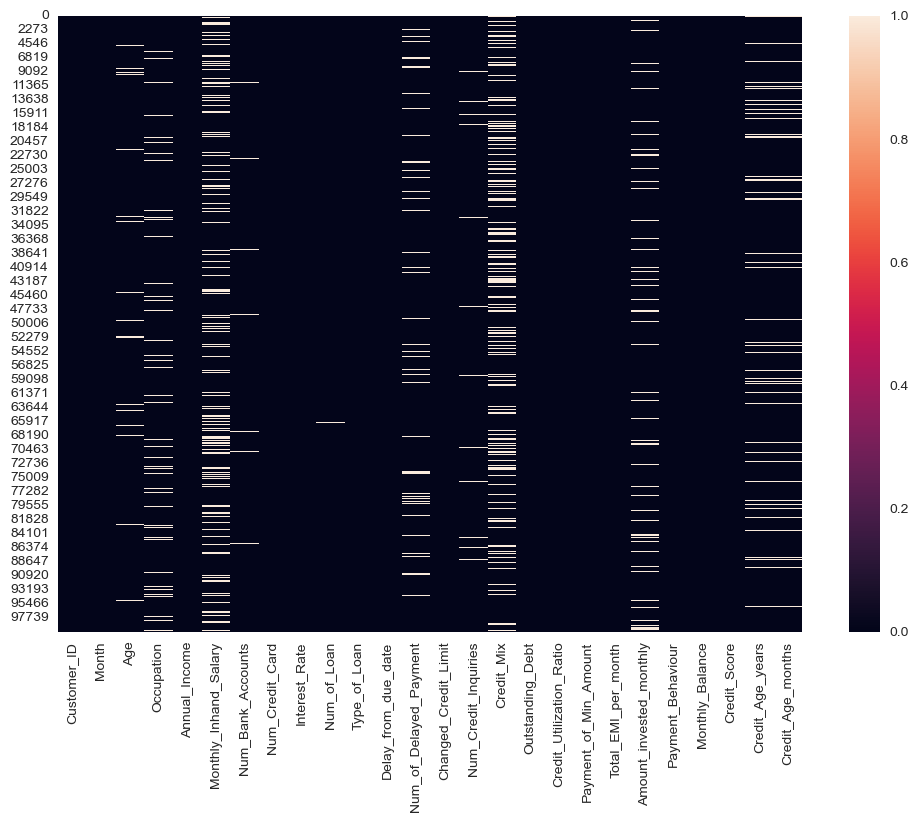

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull())

### Random Choice

In [78]:
# for column in train_data.columns:
#     missing_indices = train_data[train_data[column].isnull()].index
#     available_values = train_data[column].dropna()
    
#     for index in missing_indices:
#         random_choice = np.random.choice(available_values)
#         train_data.at[index, column] = random_choice

In [79]:
# pd.DataFrame(train_data)

In [80]:
# plt.figure(figsize=(12,8))
# sns.heatmap(train_data.isnull())

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

## 1-Fill Numerical Data

### KNN Imputer

In [81]:
numerical_data = []
object_data = []

for column in train_data.columns:
    if train_data.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [82]:
imputer = KNNImputer(n_neighbors=5)

In [83]:
train_data[numerical_data] = imputer.fit_transform(train_data[numerical_data])

In [84]:
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,26.823,No,49.575,80.415,4.0,312.494,Good,22.0,1.0
1,CUS_0xd40,2.0,23.0,Scientist,19114.12,1493.906333,3.0,4.0,3.0,4.0,...,809.98,31.945,No,49.575,118.280,3.0,284.629,Good,19.6,5.8
2,CUS_0xd40,3.0,23.6,Scientist,19114.12,1659.374833,3.0,4.0,3.0,4.0,...,809.98,28.609,No,49.575,81.700,2.0,331.210,Good,22.0,3.0
3,CUS_0xd40,4.0,23.0,Scientist,19114.12,1493.906333,3.0,4.0,3.0,4.0,...,809.98,31.378,No,49.575,199.458,1.0,223.451,Good,22.0,4.0
4,CUS_0xd40,5.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,24.797,No,49.575,41.420,5.0,341.489,Good,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,4.0,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,502.38,34.664,No,35.104,60.971,6.0,479.866,Poor,31.0,6.0
99996,CUS_0x942c,5.0,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,502.38,40.566,No,35.104,54.186,5.0,496.652,Poor,31.0,7.0
99997,CUS_0x942c,6.0,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,5729.0,2.0,...,502.38,41.256,No,35.104,24.028,6.0,516.809,Poor,31.0,8.0
99998,CUS_0x942c,7.0,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,502.38,33.638,No,35.104,251.673,3.0,319.165,Standard,31.0,9.0


In [85]:
train_data.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Credit_Age_years                0
Credit_Age_months               0
dtype: int64

<AxesSubplot:>

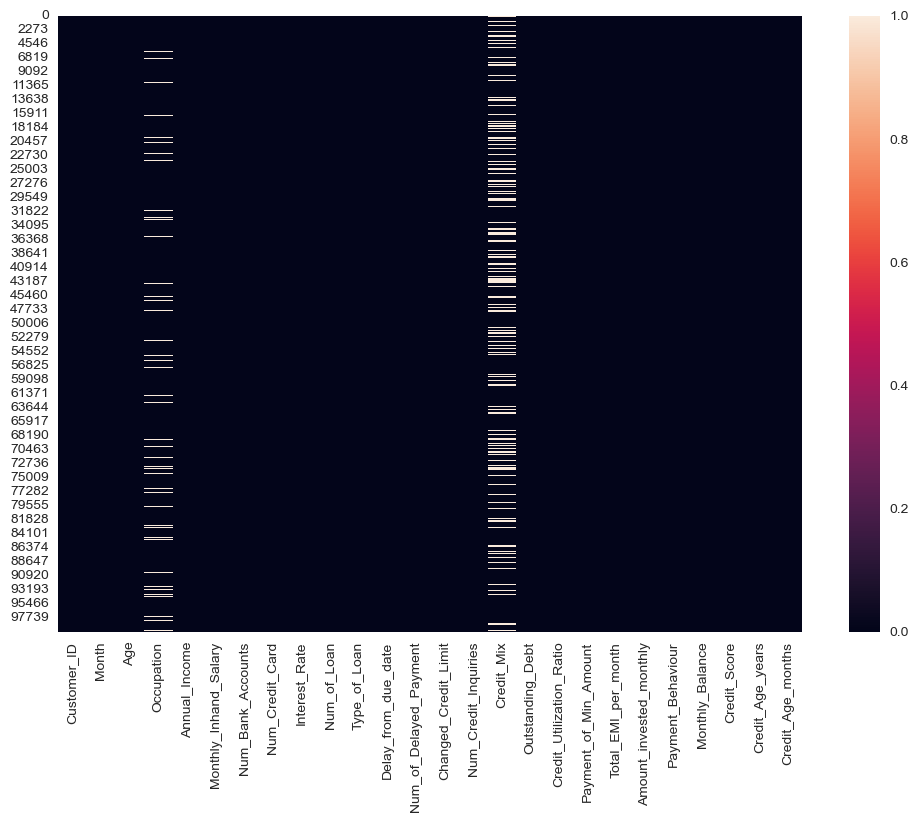

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull())

## 2-Fill Categorical Data

### Occupation

In [87]:
#train_data["Monthly_Inhand_Salary"].value_counts().head(20)                            #to know why i use ffill
#train_data.loc[train_data["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"]        #to know why i use ffill
train_data['Occupation'].ffill(inplace=True)
#train_data["Monthly_Inhand_Salary"].value_counts().head(10)
#train_data.loc[train_data["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] 

In [88]:
train_data["Monthly_Inhand_Salary"]=train_data["Monthly_Inhand_Salary"].round(3)

### Credit_Mix

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  float64
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [90]:
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Standard",1)
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Bad",2)
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Good",3)

In [91]:
imputer = IterativeImputer(max_iter=10, random_state=0)

credit_mix_data = train_data['Credit_Mix'].values.reshape(-1, 1)

train_data['Credit_Mix'] = imputer.fit_transform(credit_mix_data)

In [92]:
train_data.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

# EDA

ploting the target

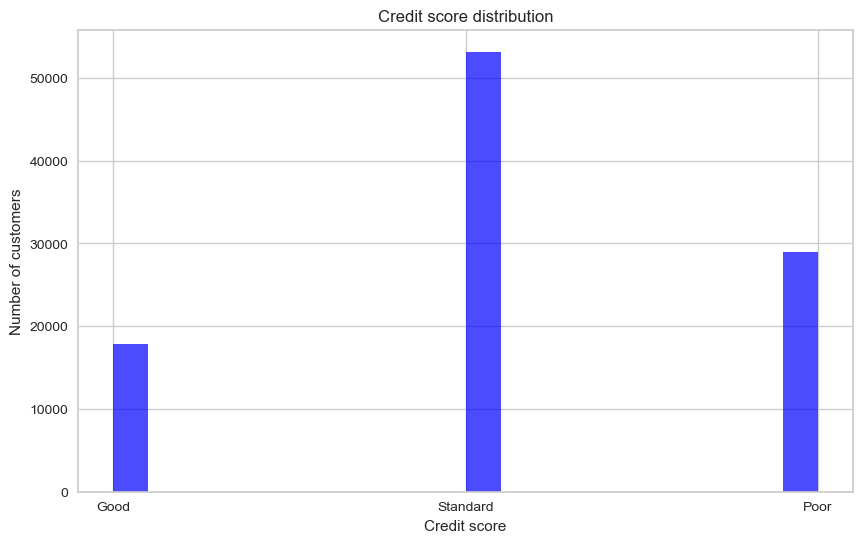

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Credit_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

This indicates that there is a discrepancy in the distribution, and this is the problem of unbalanced data

In [94]:
train_data.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_Age_years',
       'Credit_Age_months'],
      dtype='object')

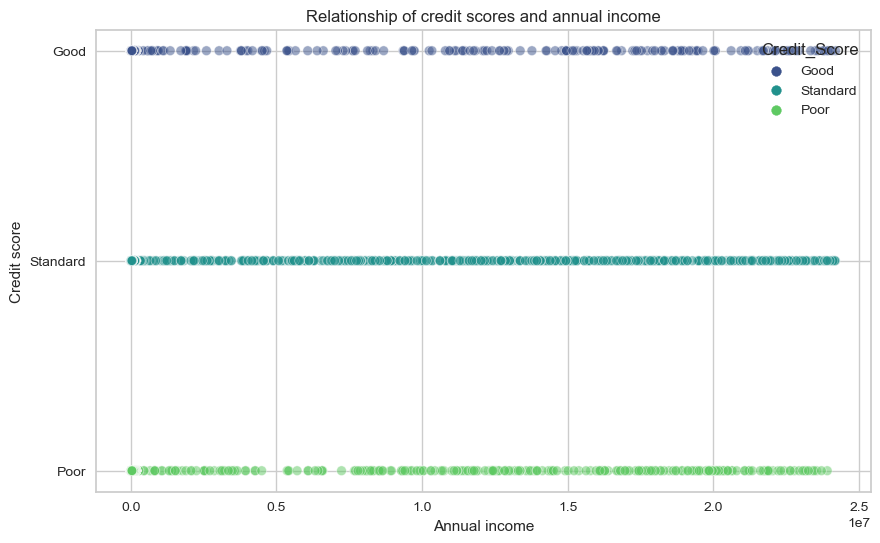

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Annual_Income'], y=train_data['Credit_Score'], hue=train_data['Credit_Score'], palette='viridis', alpha=0.5)
plt.title('Relationship of credit scores and annual income')
plt.xlabel('Annual income')
plt.ylabel('Credit score')
plt.show()

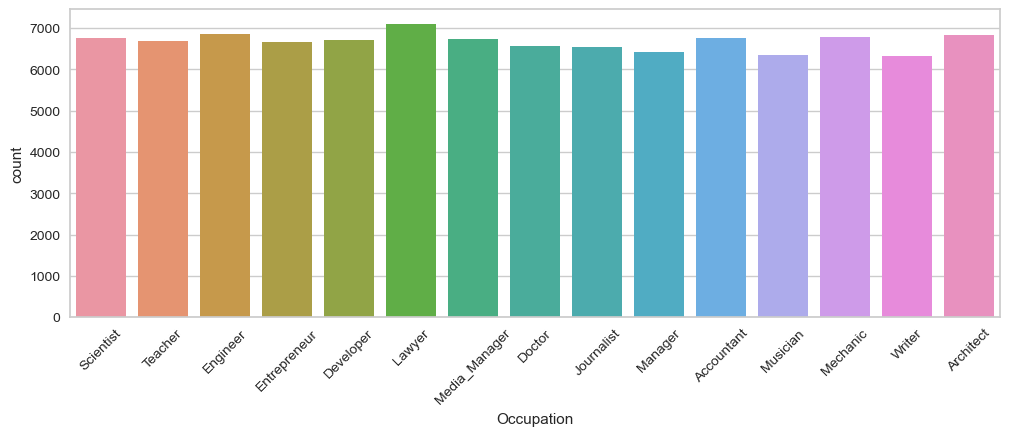

In [96]:
plt.figure(figsize=(12,4))
sns.countplot(train_data['Occupation']);
plt.xticks(rotation=45);

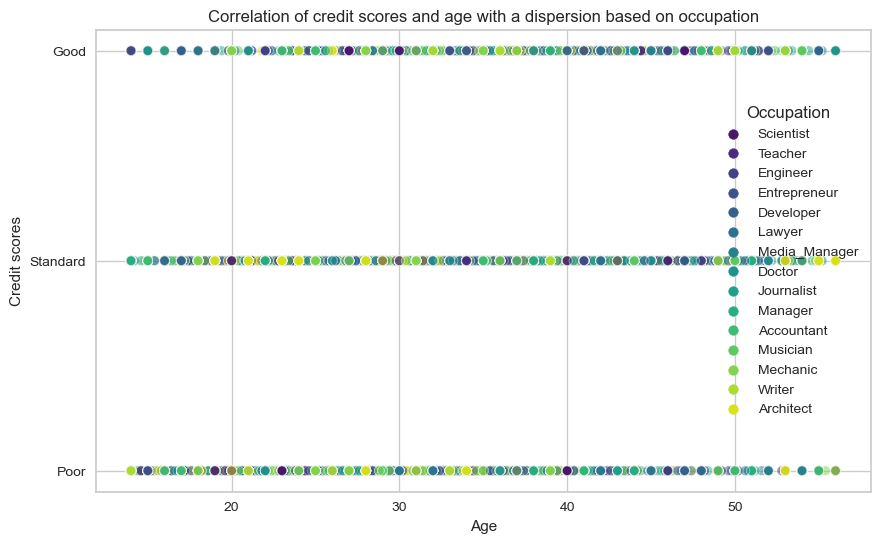

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Age'], y=train_data['Credit_Score'], hue=train_data['Occupation'], palette='viridis', alpha=0.5)
plt.title('Correlation of credit scores and age with a dispersion based on occupation')
plt.xlabel('Age')
plt.ylabel('Credit scores')
plt.show()

In [98]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(1,"Low_spent_Small_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(2,"Low_spent_Medium_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(3,"Low_spent_Large_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(4,"High_spent_Small_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(5,"High_spent_Medium_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(6,"High_spent_Large_value_payments")

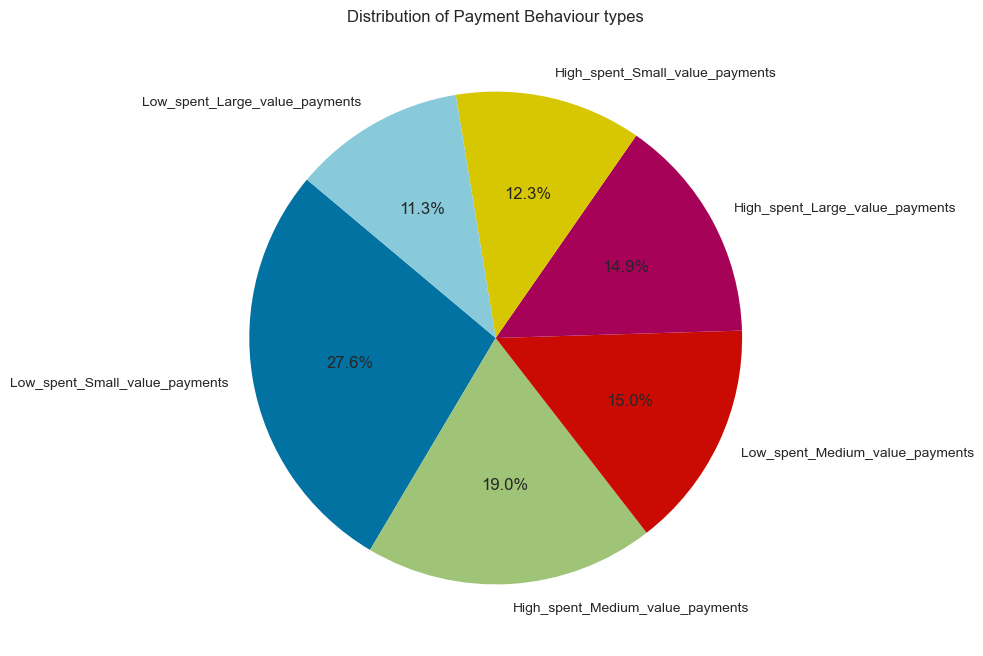

In [99]:
p_counts = train_data['Payment_Behaviour'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(p_counts, labels=p_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Behaviour types')
plt.show()

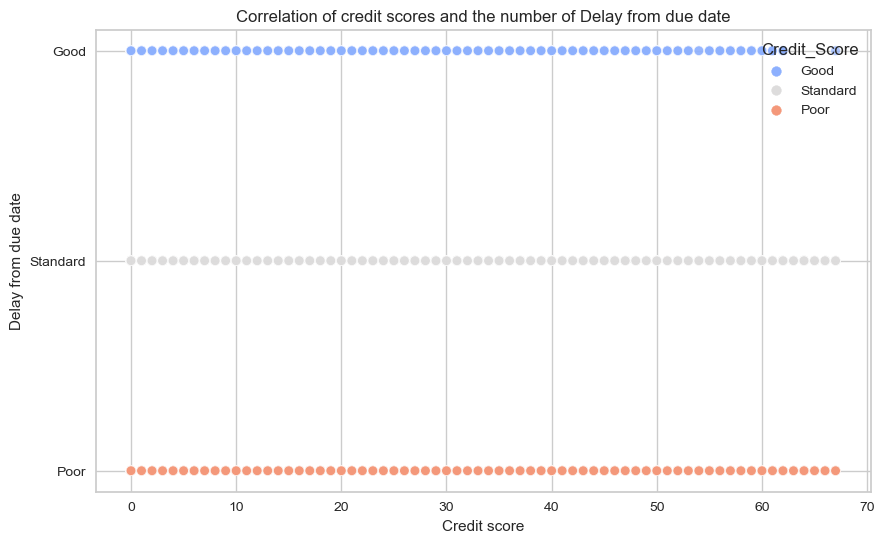

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, y='Credit_Score', x='Delay_from_due_date', hue='Credit_Score', palette='coolwarm', alpha=0.7)
plt.title('Correlation of credit scores and the number of Delay from due date')
plt.xlabel('Credit score')
plt.ylabel('Delay from due date')
plt.show()

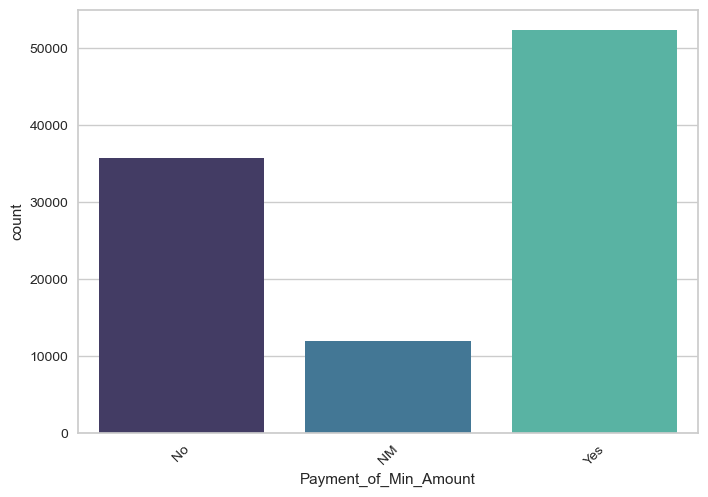

In [101]:
sns.countplot(train_data['Payment_of_Min_Amount'],palette="mako");
plt.xticks(rotation=45);

In [102]:
good_credit =train_data[train_data['Credit_Score']=="Good"]
top5=good_credit.sort_values('Annual_Income', ascending = False).head(5)

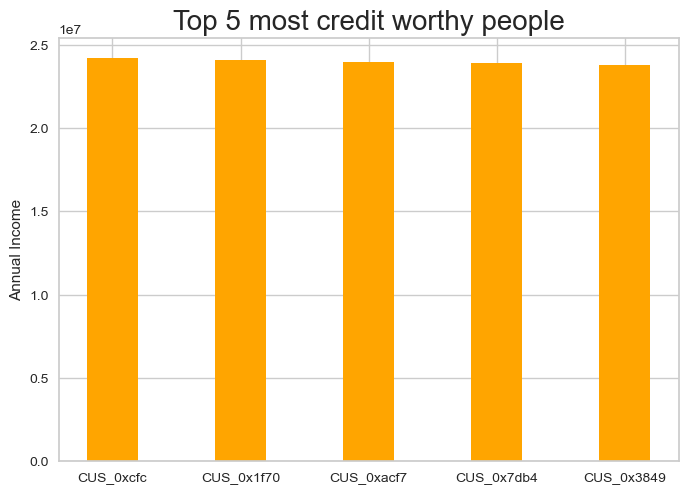

In [103]:
plt.title('Top 5 most credit worthy people', fontsize = 20)
plt.ylabel('Annual Income')
plt.bar(top5["Customer_ID"], top5.Annual_Income, tick_label = top5.Customer_ID, color = 'orange', width = 0.4);

###### Check correlations between features

<function matplotlib.pyplot.show(close=None, block=None)>

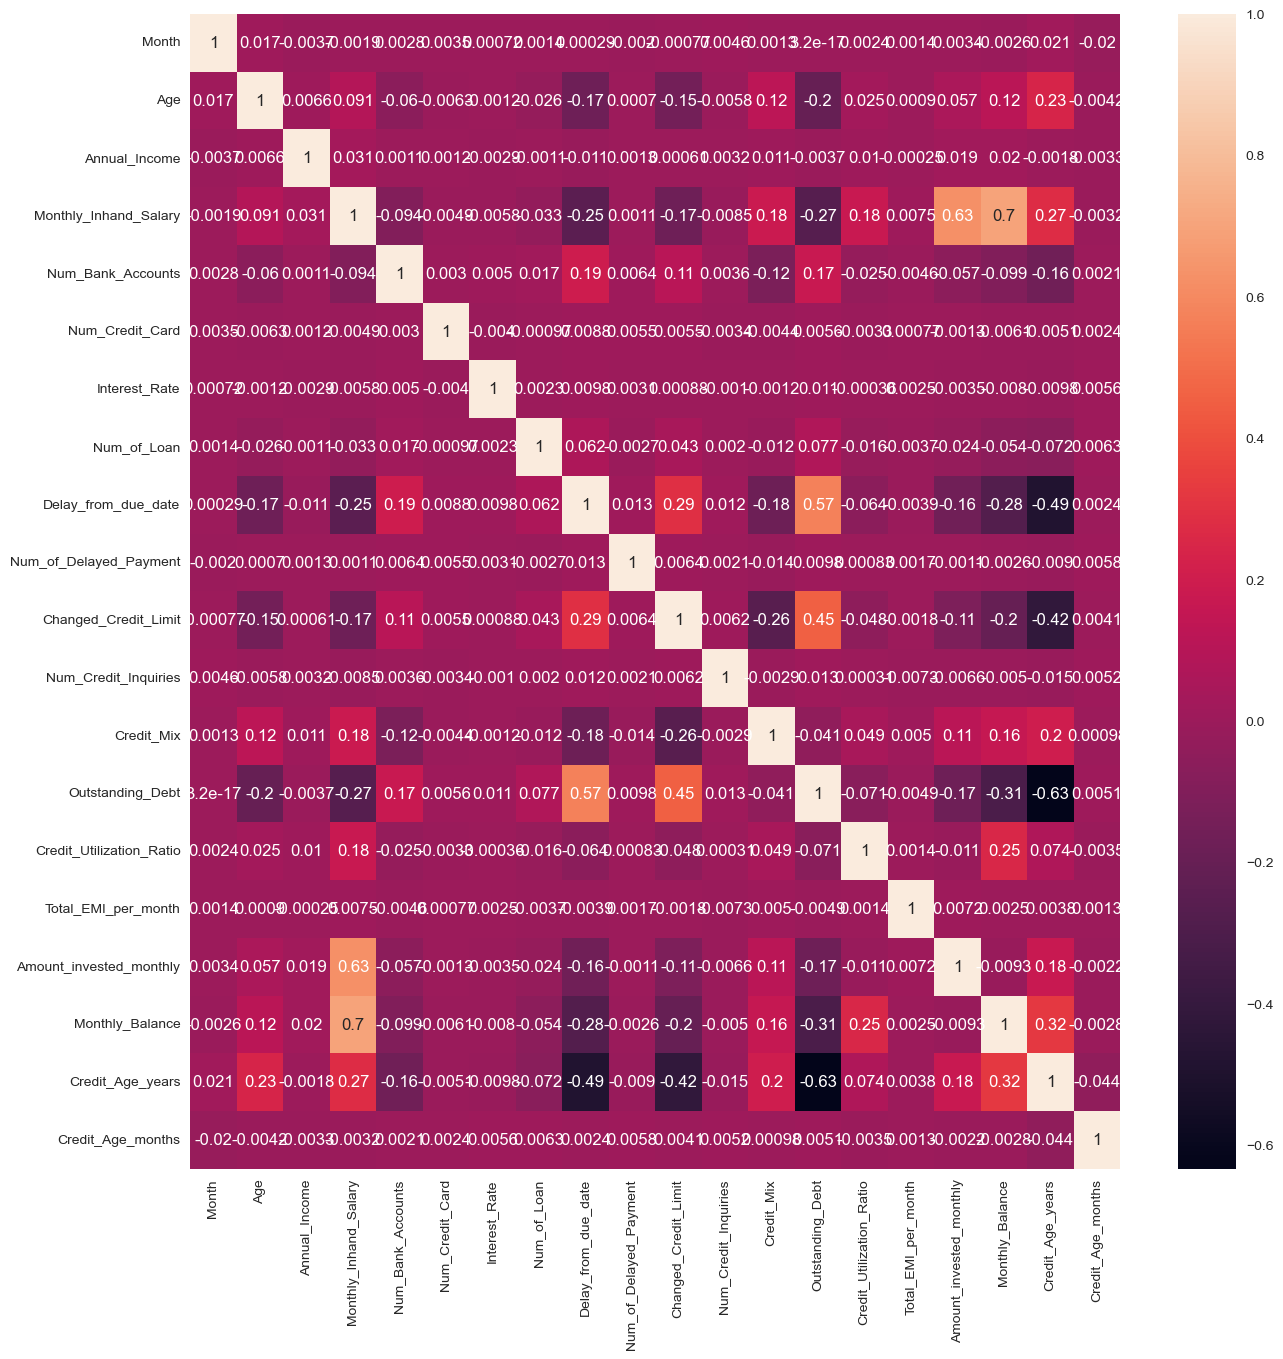

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show

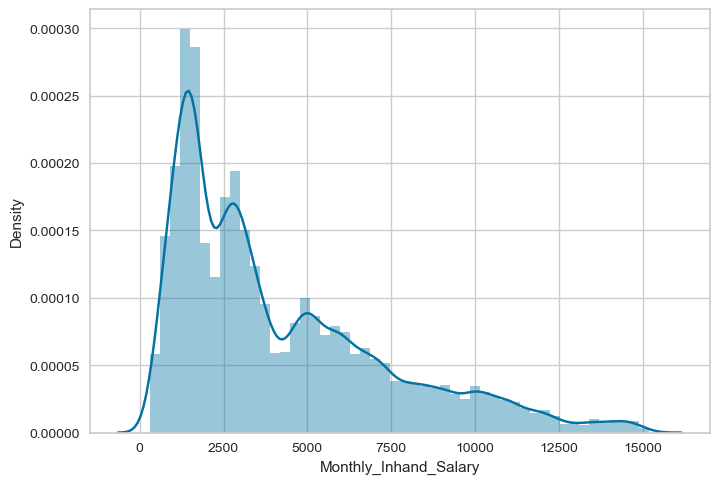

In [105]:
sns.distplot(train_data['Monthly_Inhand_Salary']);

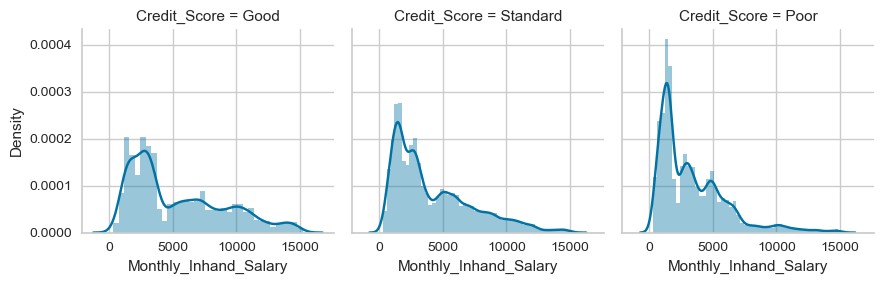

In [106]:
grid = sns.FacetGrid(train_data, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

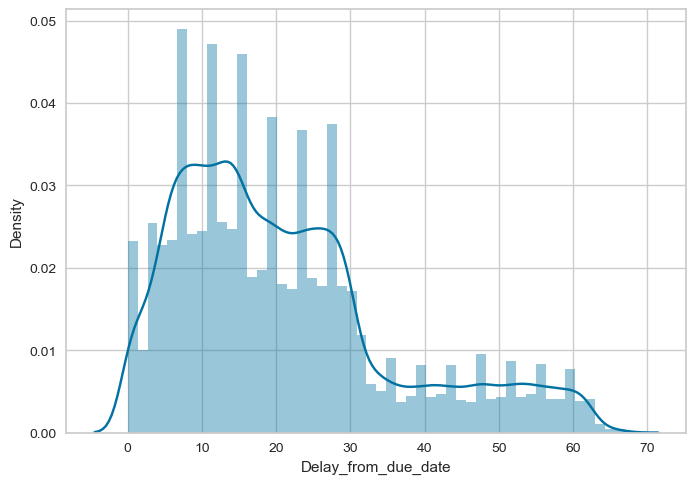

In [107]:
sns.distplot(train_data['Delay_from_due_date']);

# Encoding

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  float64
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [109]:
train_data = train_data.apply(lambda x: x.astype('category').cat.codes)
train_data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,12320,0,45,12,3021,6632,15,4,2,19,...,4265,4566,1,3514,23130,2,36146,0,110,2
1,12320,1,45,12,3021,4421,15,4,2,19,...,4265,9671,1,3514,37448,3,27188,0,98,26
2,12320,2,48,12,3021,5629,15,4,2,19,...,4265,6344,1,3514,23670,4,41449,0,110,12
3,12320,3,45,12,3021,4421,15,4,2,19,...,4265,9104,1,3514,58204,5,10304,0,110,17
4,12320,4,45,12,3021,6632,15,4,2,19,...,4265,2555,1,3514,7318,1,44188,0,110,22


# Showing Outliers 

In [110]:
train_data.describe()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6249.500000,3.500000,96.497120,6.951410,6309.706740,11539.132900,27.053530,18.893620,31.251000,19.669700,...,6068.993760,9997.027000,1.403190,5235.44290,42300.919280,2.753140,44017.845040,1.353460,89.862560,24.948440
std,3608.457213,2.291299,53.447644,4.310373,3648.564672,6985.607864,13.880526,101.713485,141.942512,19.929046,...,3516.216475,5048.918006,0.693378,3778.50903,25185.501802,1.847499,25193.513502,0.764913,41.198497,15.889932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3124.750000,1.750000,54.000000,3.000000,3154.000000,5397.000000,15.000000,4.000000,7.000000,9.000000,...,3021.750000,5789.000000,1.000000,1831.00000,20490.750000,1.000000,22582.750000,1.000000,60.000000,12.000000
50%,6249.500000,3.500000,95.000000,7.000000,6303.000000,11466.000000,29.000000,5.000000,12.000000,14.000000,...,6057.500000,10031.000000,2.000000,5040.50000,41245.000000,3.000000,43486.500000,2.000000,90.000000,25.000000
75%,9374.250000,5.250000,140.000000,11.000000,9457.000000,17557.000000,35.000000,7.000000,19.000000,28.000000,...,9101.250000,14209.000000,2.000000,8379.00000,63739.250000,5.000000,65108.250000,2.000000,125.000000,37.000000
max,12499.000000,7.000000,206.000000,14.000000,13486.000000,23904.000000,201.000000,1178.000000,1749.000000,102.000000,...,12202.000000,20484.000000,2.000000,14640.00000,88048.000000,5.000000,89465.000000,2.000000,165.000000,49.000000


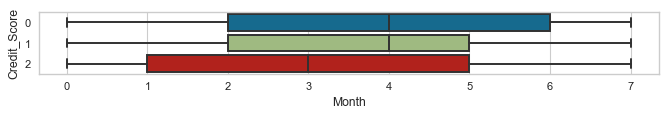

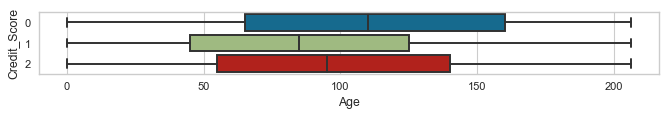

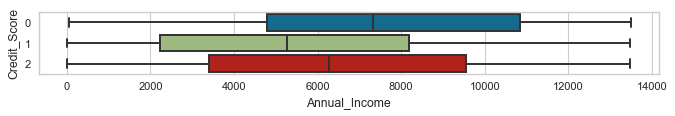

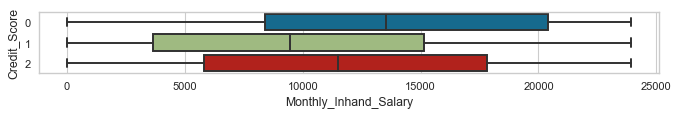

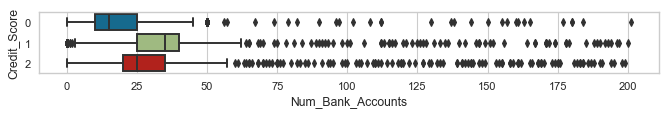

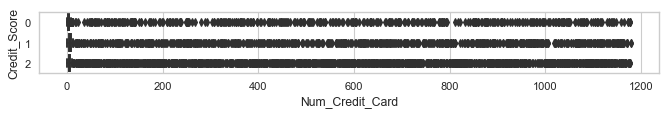

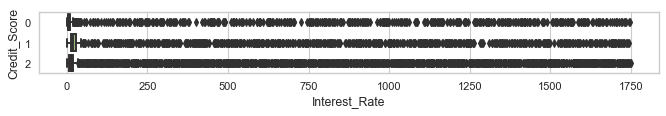

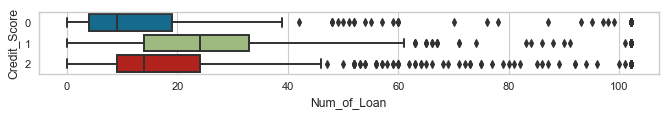

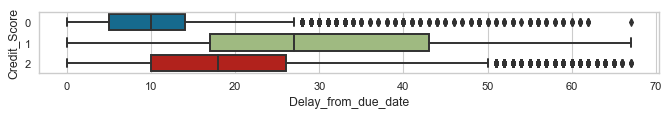

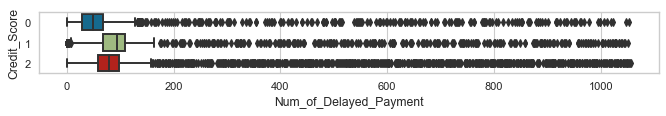

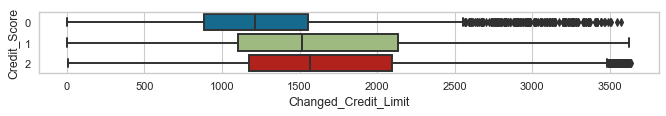

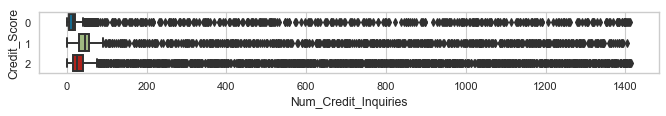

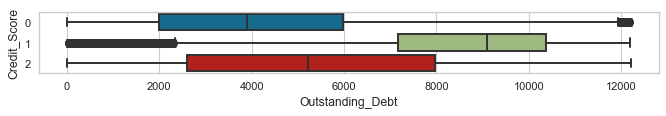

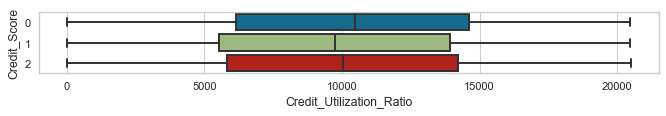

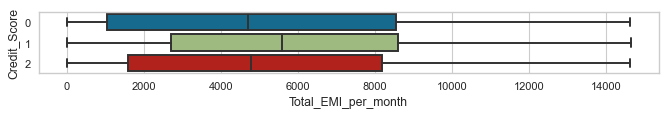

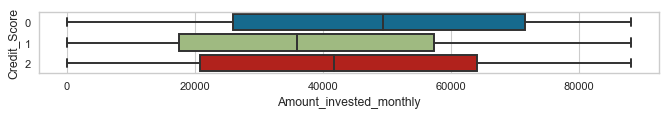

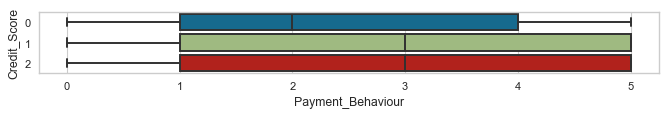

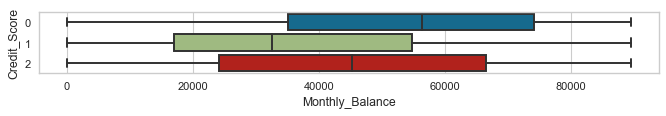

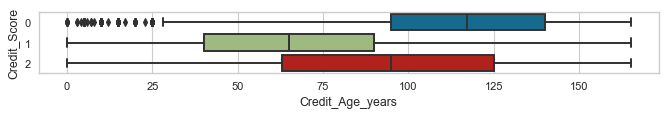

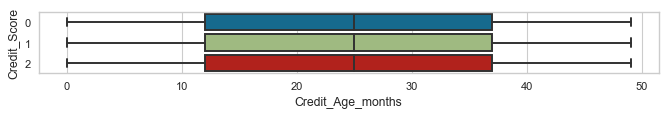

In [111]:
for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = train_data[numerical_data[i]], y=train_data['Credit_Score'], data = train_data,orient="h")
    plt.show()

In [112]:
train_data.describe()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6249.500000,3.500000,96.497120,6.951410,6309.706740,11539.132900,27.053530,18.893620,31.251000,19.669700,...,6068.993760,9997.027000,1.403190,5235.44290,42300.919280,2.753140,44017.845040,1.353460,89.862560,24.948440
std,3608.457213,2.291299,53.447644,4.310373,3648.564672,6985.607864,13.880526,101.713485,141.942512,19.929046,...,3516.216475,5048.918006,0.693378,3778.50903,25185.501802,1.847499,25193.513502,0.764913,41.198497,15.889932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3124.750000,1.750000,54.000000,3.000000,3154.000000,5397.000000,15.000000,4.000000,7.000000,9.000000,...,3021.750000,5789.000000,1.000000,1831.00000,20490.750000,1.000000,22582.750000,1.000000,60.000000,12.000000
50%,6249.500000,3.500000,95.000000,7.000000,6303.000000,11466.000000,29.000000,5.000000,12.000000,14.000000,...,6057.500000,10031.000000,2.000000,5040.50000,41245.000000,3.000000,43486.500000,2.000000,90.000000,25.000000
75%,9374.250000,5.250000,140.000000,11.000000,9457.000000,17557.000000,35.000000,7.000000,19.000000,28.000000,...,9101.250000,14209.000000,2.000000,8379.00000,63739.250000,5.000000,65108.250000,2.000000,125.000000,37.000000
max,12499.000000,7.000000,206.000000,14.000000,13486.000000,23904.000000,201.000000,1178.000000,1749.000000,102.000000,...,12202.000000,20484.000000,2.000000,14640.00000,88048.000000,5.000000,89465.000000,2.000000,165.000000,49.000000


# Feature Selection

In [113]:
# Create a contingency table for each categorical column
for col in train_data.columns:
    contingency_table = pd.crosstab(train_data[col],train_data['Credit_Score'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies table:\n{expected}\n")

Chi-square test results for Customer_ID:
Chi-square statistic: 133795.84086124436
P-value: 0.0
Degrees of freedom: 24998
Expected frequencies table:
[[1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 ...
 [1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]]

Chi-square test results for Month:
Chi-square statistic: 201.80530639299857
P-value: 2.349409913674008e-35
Degrees of freedom: 14
Expected frequencies table:
[[2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]
 [2228.5  3624.75 6646.75]]

Chi-square test results for Age:
Chi-square statistic: 5172.672724197251
P-value: 0.0
Degrees of freedom: 412
Expected frequencies table:
[[2.10905240e+02 3.43046340e+02 6.29048420e+02]
 [1.78280000e-01 2.89980000e-01 5.31740000e-01]
 [3.56560000e-01 5.79960000e-01 1.06348000e+00]
 [7.13120000e-01 1.15992

Chi-square test results for Annual_Income:
Chi-square statistic: 134413.15470134554
P-value: 0.0
Degrees of freedom: 26972
Expected frequencies table:
[[1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 ...
 [0.17828 0.28998 0.53174]
 [0.17828 0.28998 0.53174]
 [0.17828 0.28998 0.53174]]

Chi-square test results for Monthly_Inhand_Salary:
Chi-square statistic: 143396.63007890809
P-value: 0.0
Degrees of freedom: 47808
Expected frequencies table:
[[1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]
 [1.24796 2.02986 3.72218]
 ...
 [1.24796 2.02986 3.72218]
 [1.42624 2.31984 4.25392]
 [1.42624 2.31984 4.25392]]

Chi-square test results for Num_Bank_Accounts:
Chi-square statistic: 21152.045201147914
P-value: 0.0
Degrees of freedom: 402
Expected frequencies table:
[[7.77835640e+02 1.26518274e+03 2.31998162e+03]
 [8.91400000e-01 1.44990000e+00 2.65870000e+00]
 [1.78280000e-01 2.89980000e-01 5.31740000e-01]
 [3.56560000e-01 5.79960000e-01 1.06348000e+00]
 [1.069

Chi-square test results for Type_of_Loan:
Chi-square statistic: 66206.2960430677
P-value: 0.0
Degrees of freedom: 12518
Expected frequencies table:
[[226.77216 368.85456 676.37328]
 [  2.85248   4.63968   8.50784]
 [  1.42624   2.31984   4.25392]
 ...
 [ 49.9184   81.1944  148.8872 ]
 [ 31.37728  51.03648  93.58624]
 [ 41.36096  67.27536 123.36368]]

Chi-square test results for Delay_from_due_date:
Chi-square statistic: 24626.21630538984
P-value: 0.0
Degrees of freedom: 134
Expected frequencies table:
[[ 318.40808  517.90428  949.68764]
 [ 236.39928  384.51348  705.08724]
 [ 239.25176  389.15316  713.59508]
 [ 300.58008  488.90628  896.51364]
 [ 306.99816  499.34556  915.65628]
 [ 542.32776  882.11916 1617.55308]
 [ 559.26436  909.66726 1668.06838]
 [ 576.55752  937.79532 1719.64716]
 [ 592.60272  963.89352 1767.50376]
 [ 576.37924  937.50534 1719.11542]
 [ 584.93668  951.42438 1744.63894]
 [ 567.28696  922.71636 1691.99668]
 [ 559.97748  910.82718 1670.19534]
 [ 610.43072  992.89152 1

# Splitting Data

In [114]:
x= train_data.drop(['Credit_Score','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'],axis=1)
y=train_data['Credit_Score']
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

# Balanced Data

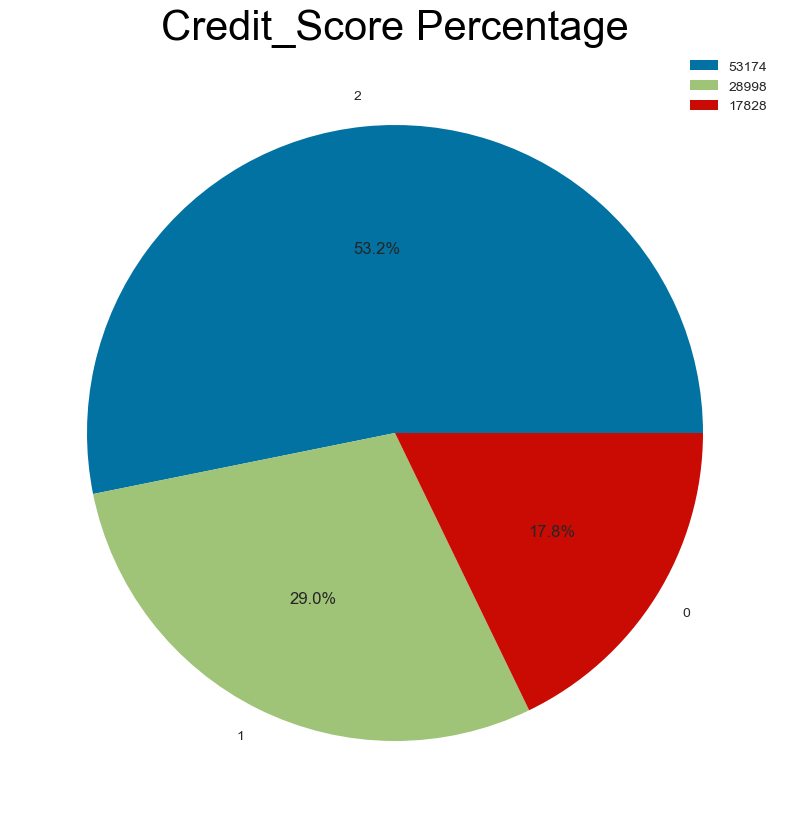

In [115]:
labels = train_data["Credit_Score"].value_counts().index
sizes = train_data["Credit_Score"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(train_data["Credit_Score"].value_counts())
plt.show()

In [116]:
sm = SMOTE(k_neighbors=7)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [117]:
data_after_smote = pd.DataFrame(x_train_sm, columns=x_train.columns)
data_after_smote['target'] = y_train_sm 

In [118]:
data_after_smote['target']

0         2
1         0
2         0
3         2
4         0
         ..
127720    1
127721    1
127722    1
127723    1
127724    1
Name: target, Length: 127725, dtype: int8

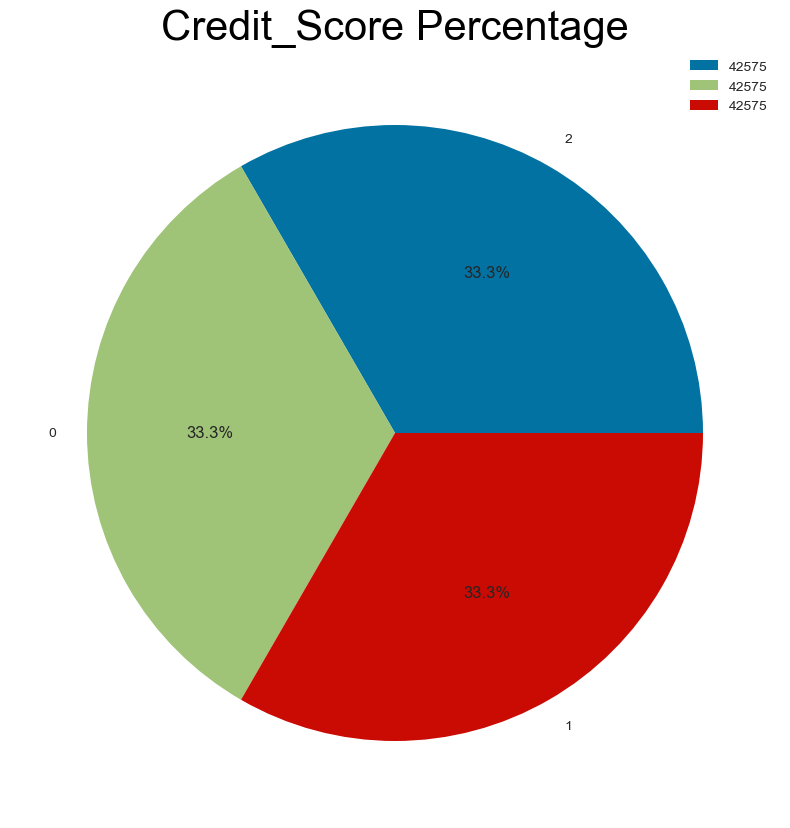

In [119]:
labels = data_after_smote['target'].value_counts().index
sizes = data_after_smote['target'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(data_after_smote['target'].value_counts())
plt.show()

In [120]:
data_after_smote

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Credit_Age_months,target
0,3590,30,10948,20870,5,3,1,9,3461,14,...,1028,20,3,5535,1,7678,1,120,42,2
1,8067,55,11344,21737,25,1,9,19,981,12,...,1155,0,3,3821,1,10867,0,140,49,0
2,11093,175,4440,7602,25,7,7,14,5746,28,...,716,20,0,2398,1,10253,5,130,42,0
3,1306,100,3984,6751,35,7,8,19,2982,16,...,1656,15,1,874,1,4258,3,142,26,2
4,1018,70,3722,7072,10,3,8,4,0,2,...,1525,5,3,3870,0,559,1,120,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127720,2209,125,8168,15310,40,6,16,19,6223,22,...,2330,35,0,9009,1,6971,0,74,32,1
127721,9502,42,9393,17871,46,7,21,38,541,42,...,1485,56,1,10883,2,11180,3,44,27,1
127722,10379,135,7329,13706,52,5,21,9,2093,22,...,1869,30,0,10075,0,4100,2,78,24,1
127723,1672,135,8864,16564,46,7,17,37,5175,29,...,701,43,2,7515,2,10944,1,68,8,1


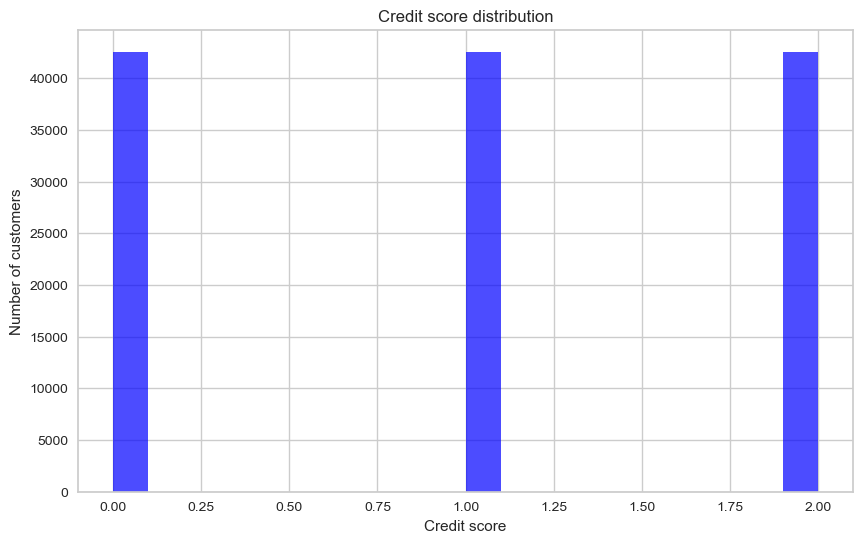

In [121]:
plt.figure(figsize=(10, 6))
plt.hist(data_after_smote['target'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

# Splittind Data After Smote

In [122]:
X= data_after_smote.drop(['target'],axis=1)
Y=data_after_smote['target']

# Scaling

In [123]:
sc = StandardScaler()
X= sc.fit_transform(X)

#### preparation test data

In [124]:
test_data=pd.read_csv("test.csv",sep=",",encoding="utf-8")
test_data=test_data.drop(columns=["ID","Name","SSN"],axis=1)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)


In [125]:
#test data
years  = []
months = []
for value in test_data["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
test_data['Credit_Age_years'] = pd.Series(years)
test_data['Credit_Age_months'] = pd.Series(months) 
test_data.drop('Credit_History_Age',axis=1,inplace=True)

In [126]:
test_data["Total_EMI_per_month"]=test_data["Total_EMI_per_month"].round(3)
test_data["Total_EMI_per_month"]=test_data["Total_EMI_per_month"].astype("float")
test_data["Credit_Utilization_Ratio"]=test_data["Credit_Utilization_Ratio"].round(3)
test_data["Type_of_Loan"]=test_data["Type_of_Loan"].astype("object")
test_data["Num_Bank_Accounts"]=test_data["Num_Bank_Accounts"].round().astype('Int64')
test_data["Monthly_Inhand_Salary"]=test_data["Monthly_Inhand_Salary"].round(3)

In [127]:
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Standard",1)
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Bad",2)
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Good",3)

In [128]:
test_month={"September":9,"October":10,"November":11,"December":12}
test_data["Month"]=test_data["Month"].replace(test_month)

In [129]:
# columns=train_data.drop(['Credit_Score','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'],axis=1).columns

In [130]:
test_data=test_data.drop(['Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'], axis=1)

In [131]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             50000 non-null  object 
 1   Age                     50000 non-null  object 
 2   Annual_Income           50000 non-null  object 
 3   Monthly_Inhand_Salary   42502 non-null  float64
 4   Num_Bank_Accounts       50000 non-null  Int64  
 5   Num_Credit_Card         50000 non-null  int64  
 6   Interest_Rate           50000 non-null  int64  
 7   Num_of_Loan             50000 non-null  object 
 8   Type_of_Loan            44296 non-null  object 
 9   Delay_from_due_date     50000 non-null  int64  
 10  Num_of_Delayed_Payment  46502 non-null  object 
 11  Changed_Credit_Limit    50000 non-null  object 
 12  Num_Credit_Inquiries    48965 non-null  float64
 13  Credit_Mix              50000 non-null  object 
 14  Outstanding_Debt        50000 non-null

In [132]:
test_data = test_data.apply(lambda x: x.astype('category').cat.codes)
test_data.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Credit_Age_months
0,12320,156,5060,3858,4,4,2,140,128,8,403,966,588,2,11620,1,3295,0,22,9
1,12320,171,5060,3858,4,4,2,140,128,8,429,1187,4,2,11620,1,3295,4,22,10
2,12320,171,5060,3858,4,4,2,140,128,4,335,1076,4,2,11620,1,3295,1,-1,-1
3,12320,183,5060,-1,4,4,2,140,128,9,380,966,4,2,11620,1,3295,4,23,0
4,1066,225,8715,6304,3,4,5,3,684,8,8,3350,5,2,10414,1,730,5,27,3


# Split Data

In [133]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.3,random_state=42)

In [134]:
pd.DataFrame(x_train_sm)

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Credit_Age_months,target
0,3590,30,10948,20870,5,3,1,9,3461,14,...,1028,20,3,5535,1,7678,1,120,42,2
1,8067,55,11344,21737,25,1,9,19,981,12,...,1155,0,3,3821,1,10867,0,140,49,0
2,11093,175,4440,7602,25,7,7,14,5746,28,...,716,20,0,2398,1,10253,5,130,42,0
3,1306,100,3984,6751,35,7,8,19,2982,16,...,1656,15,1,874,1,4258,3,142,26,2
4,1018,70,3722,7072,10,3,8,4,0,2,...,1525,5,3,3870,0,559,1,120,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127720,2209,125,8168,15310,40,6,16,19,6223,22,...,2330,35,0,9009,1,6971,0,74,32,1
127721,9502,42,9393,17871,46,7,21,38,541,42,...,1485,56,1,10883,2,11180,3,44,27,1
127722,10379,135,7329,13706,52,5,21,9,2093,22,...,1869,30,0,10075,0,4100,2,78,24,1
127723,1672,135,8864,16564,46,7,17,37,5175,29,...,701,43,2,7515,2,10944,1,68,8,1


In [135]:
y_test

30315     0
105383    0
48160     1
43762     1
63462     1
         ..
118679    1
68833     2
19875     2
41920     2
65032     1
Name: target, Length: 89408, dtype: int8

# Modeling

### RF

In [136]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)  
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
RF.score(x_train,y_train)

0.9999739019234283

In [138]:
RF.score(x_test,y_test)

0.816571224051539

In [139]:
Y_pred=RF.predict(x_test)
Y_pred

array([2, 0, 1, ..., 2, 2, 1], dtype=int8)

In [140]:
df=pd.DataFrame({"y_predect":Y_pred,"y_test":y_test})
df

,y_predect,y_test
30315,2,0
105383,0,0
48160,1,1
43762,1,1
63462,1,1
...,...,...
118679,1,1
68833,1,2
19875,2,2
41920,2,2


In [141]:
report = classification_report(y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85     29743
           1       0.84      0.85      0.84     29767
           2       0.81      0.69      0.75     29898

    accuracy                           0.82     89408
   macro avg       0.82      0.82      0.81     89408
weighted avg       0.82      0.82      0.81     89408



#### use test data to prediction

In [142]:
pred=RF.predict(test_data)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

### Xgboost

In [143]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [144]:
recall = recall_score(y_test, Y_pred, average='macro')  
print(f"Recall: {recall:.2f}")

Recall: 0.82


In [145]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     29743
           1       0.83      0.81      0.82     29767
           2       0.78      0.72      0.74     29898

    accuracy                           0.80     89408
   macro avg       0.80      0.80      0.80     89408
weighted avg       0.80      0.80      0.80     89408



In [146]:
Y_pred=model.predict(test_data)
Y_pred

array([2, 2, 1, ..., 2, 2, 2])

In [147]:
(Y_pred[Y_pred>0.49].shape[0]/Y_pred.shape[0])*100

99.966

## PyCaret

In [148]:
s = setup(x_train_sm, target = y_train_sm,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(127725, 22)"
4,Transformed data shape,"(127725, 22)"
5,Transformed train set shape,"(89407, 22)"
6,Transformed test set shape,"(38318, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [149]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6150
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3950
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8990
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.6830
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6430
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.2670
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3600
nb,Naive Bayes,0.9818,0.9967,0.9818,0.9818,0.9818,0.9728,0.9728,1.4580
ridge,Ridge Classifier,0.9020,0.0000,0.9020,0.9040,0.9003,0.8530,0.8556,0.5170
lda,Linear Discriminant Analysis,0.6803,0.8053,0.6803,0.6788,0.6774,0.5205,0.5222,0.6310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

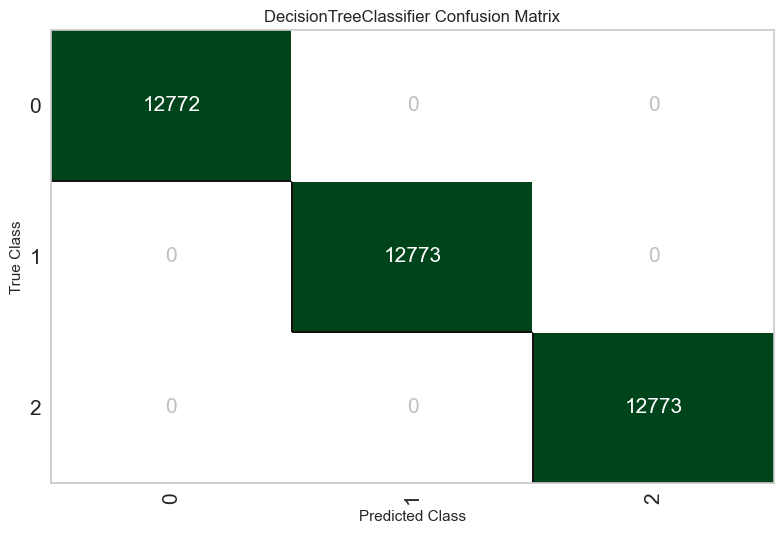

In [150]:
plot_model(best, plot = 'confusion_matrix')

In [151]:
# predict on test set
p = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [152]:
p.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Credit_Age_months,target,Credit_Score,prediction_label,prediction_score
114224,5686,40,7403,13474,30,7,22,24,5162,42,...,9548,2,6868,4,95,18,1,1,1,1.0
58692,8699,50,10689,20324,40,6,14,0,1402,29,...,7807,1,0,4,75,32,2,2,2,1.0
125210,3787,46,7654,14296,30,4,19,26,4813,19,...,8346,2,7988,1,56,34,1,1,1,1.0
33606,5209,15,5147,10128,35,9,31,24,1432,54,...,9718,2,7341,5,100,22,1,1,1,1.0
78406,2700,60,6202,11049,25,3,8,4,2779,28,...,2763,0,1282,1,90,27,2,2,2,1.0


In [153]:
test_data.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Credit_Age_months
0,12320,156,5060,3858,4,4,2,140,128,8,403,966,588,2,11620,1,3295,0,22,9
1,12320,171,5060,3858,4,4,2,140,128,8,429,1187,4,2,11620,1,3295,4,22,10
2,12320,171,5060,3858,4,4,2,140,128,4,335,1076,4,2,11620,1,3295,1,-1,-1
3,12320,183,5060,-1,4,4,2,140,128,9,380,966,4,2,11620,1,3295,4,23,0
4,1066,225,8715,6304,3,4,5,3,684,8,8,3350,5,2,10414,1,730,5,27,3
